In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#import numpy as np: Numpy adalah paket Python yang memberikan dukungan untuk array multidimensi, serta berbagai fungsi matematika yang kuat untuk bekerja dengan array tersebut. Dalam kode ini, paket tersebut diimpor sebagai "np" agar lebih mudah dipanggil.
#import pandas as pd: Pandas adalah perpustakaan Python yang menyediakan struktur data dan alat analisis data. DataFrame, yang merupakan struktur data utama dalam pandas, memungkinkan Anda untuk menyimpan dan memanipulasi data dalam bentuk tabel. Di sini, paket tersebut diimpor sebagai "pd" untuk memanggilnya lebih mudah.
#import matplotlib.pyplot as plt: Matplotlib adalah perpustakaan untuk membuat visualisasi dalam Python. Dalam kode ini, kita mengimpor modul pyplot dari Matplotlib sebagai "plt" agar lebih mudah dipanggil.
#import seaborn as sns: Seaborn adalah perpustakaan Python yang dibangun di atas Matplotlib, yang menyediakan antarmuka tingkat tinggi untuk membuat grafik statistik yang lebih menarik dan informatif. Di sini, kita mengimpor Seaborn sebagai "sns".
#from sklearn.model_selection import train_test_split: scikit-learn (sklearn) adalah perpustakaan Python yang populer untuk machine learning. Fungsi train_test_split dari modul model_selection digunakan untuk membagi data menjadi set pelatihan dan pengujian.
#from sklearn.preprocessing import MinMaxScaler: Ini mengimpor MinMaxScaler dari modul preprocessing di scikit-learn. MinMaxScaler digunakan untuk penskalaan fitur sehingga semua fitur berada dalam rentang yang sama.
#from tensorflow.keras.models import Sequential: TensorFlow adalah platform open-source yang kuat untuk pembelajaran mesin dan kecerdasan buatan. Di sini, kita mengimpor kelas Sequential dari TensorFlow untuk membangun model neural network berurutan.
#from tensorflow.keras.layers import Dense: Ini mengimpor kelas Dense dari modul layers di TensorFlow. Dense digunakan untuk menambahkan lapisan neuron ke dalam model neural network.
#from sklearn.linear_model import LinearRegression: Ini mengimpor model regresi linear dari scikit-learn. Model ini digunakan untuk melakukan regresi linear pada data.
#from sklearn.metrics import r2_score: Ini mengimpor fungsi r2_score dari modul metrics di scikit-learn. Fungsi ini digunakan untuk menghitung koefisien determinasi (R-squared) dari model regresi.
#from sklearn.metrics import confusion_matrix mengimpor fungsi confusion_matrix dari modul metrics yang terdapat dalam pustaka scikit-learn (sklearn).
#from sklearn.metrics import classification_report : Metode ini berguna untuk memberikan ringkasan yang komprehensif tentang kinerja model klasifikasi berdasarkan beberapa metrik evaluasi.


In [5]:
df = pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')
df.head()

#df = pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1'): perintah untuk membaca sebuah file CSV (comma-separated values) ke dalam sebuah DataFrame menggunakan pandas. Dalam kasus ini, file CSV yang dibaca adalah 'car_purchasing.csv' yang berlokasi di '/content/' directory. Parameter encoding='ISO-8859-1' diberikan untuk menentukan metode encoding yang digunakan saat membaca file CSV. Penggunaan encoding tertentu seperti 'ISO-8859-1' sering diperlukan ketika file CSV berisi karakter non-standar atau khusus. DataFrame yang dibaca dari file CSV tersebut disimpan dalam variabel yang diberi nama 'df'.
#df.head(): perintah untuk menampilkan beberapa baris pertama dari DataFrame 'df' yang telah dibaca sebelumnya. Secara default, fungsi head() akan menampilkan lima baris pertama dari DataFrame jika tidak disertakan parameter. Fungsi ini berguna untuk memberikan gambaran awal tentang struktur dan konten dari DataFrame yang telah dibaca.



,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


Membaca data test yang telah dimasukan yaitu car_puchasing.csv

In [6]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

#df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True): metode untuk melakukan penghapusan kolom (atau variabel) dari DataFrame. Parameter 'columns' digunakan untuk menentukan nama kolom yang akan dihapus, dalam hal ini kolom 'customer name', 'customer e-mail', 'country', dan 'gender'. Nilai 'inplace=True' menunjukkan bahwa operasi ini dilakukan secara langsung pada DataFrame 'df' yang ada, yang berarti DataFrame 'df' akan dimodifikasi secara permanen tanpa perlu membuat DataFrame baru.



In [7]:
df.head()

#df.head(): perintah untuk menampilkan beberapa baris pertama dari DataFrame 'df' yang telah dibaca sebelumnya.



,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [8]:
df.info() #df.info(): Metode info() memberikan informasi ringkas tentang DataFrame, termasuk jumlah baris, jumlah kolom, tipe data dari setiap kolom, dan jumlah nilai non-null (non-missing) dalam setiap kolom.
df.isna().sum() #df.isna().sum(): Metode ini digunakan untuk menghitung jumlah nilai null (missing values) dalam setiap kolom DataFrame 'df'. Pertama, df.isna() menghasilkan DataFrame yang berisi nilai boolean, di mana nilai True menunjukkan bahwa nilai tersebut adalah null, dan False menunjukkan bahwa nilai tersebut bukan null. Kemudian, dengan menggunakan metode sum(), kita menghitung jumlah nilai True (yaitu, jumlah nilai null) dalam setiap kolom. Hasilnya adalah sebuah Series yang berisi jumlah nilai null untuk setiap kolom dalam DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

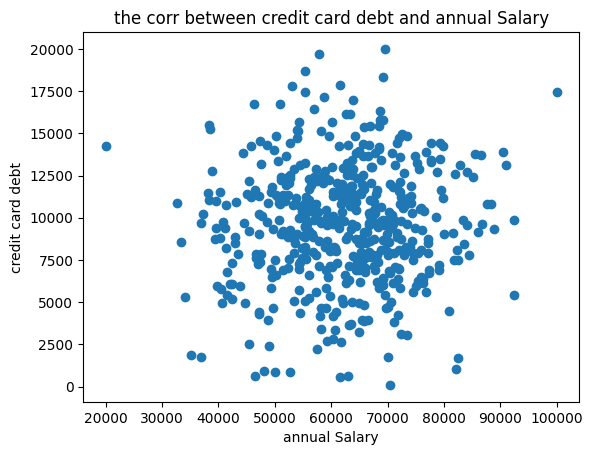

In [9]:
plt.scatter(df['annual Salary'] , df['credit card debt']) #perintah untuk membuat scatter plot menggunakan data dari kolom 'annual Salary' sebagai sumbu x dan kolom 'credit card debt' sebagai sumbu y. Scatter plot ini akan menunjukkan hubungan atau distribusi antara gaji tahunan dan hutang kartu kredit untuk setiap entri dalam DataFrame 'df'.
plt.xlabel('annual Salary') #perintah untuk menambahkan label sumbu x pada scatter plot. Dalam hal ini, label sumbu x akan menjadi 'annual Salary', yang merupakan gaji tahunan.
plt.ylabel('credit card debt') #perintah untuk menambahkan label sumbu y pada scatter plot. Dalam hal ini, label sumbu y akan menjadi 'credit card debt', yang merupakan hutang kartu kredit.
plt.title('the corr between credit card debt and annual Salary') #perintah untuk menambahkan judul pada scatter plot. Judulnya adalah 'the corr between credit card debt and annual Salary', yang berarti "korelasi antara hutang kartu kredit dan gaji tahunan". Ini memberikan informasi tentang konteks dari scatter plot tersebut, yaitu menunjukkan bahwa plot ini adalah tentang hubungan antara gaji tahunan dan hutang kartu kredit.


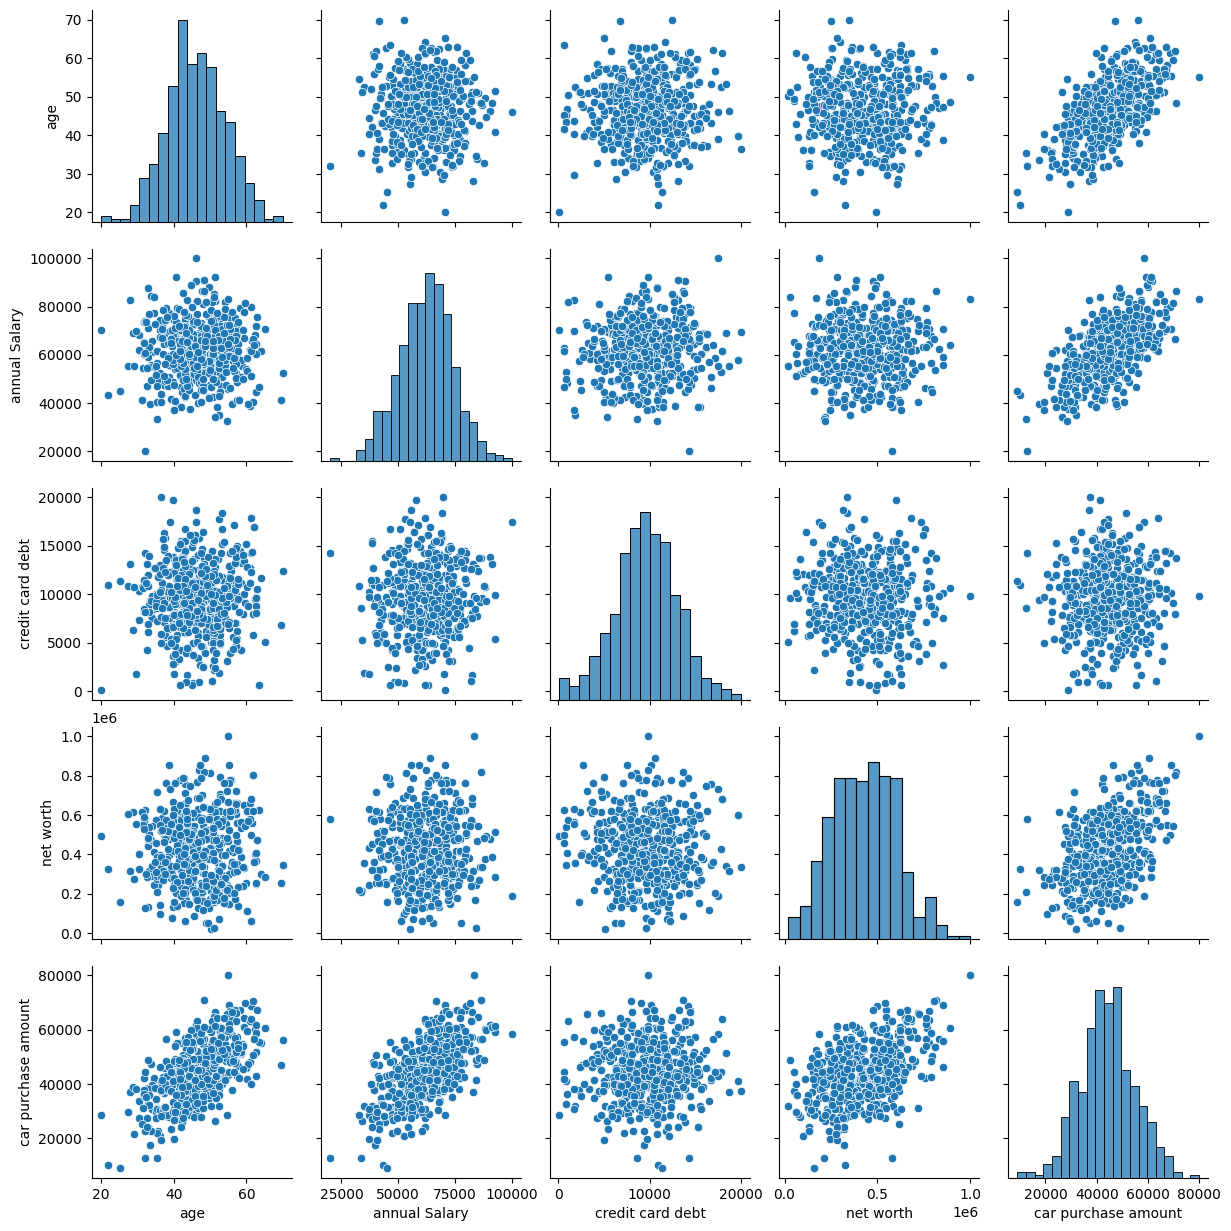

In [10]:
sns.pairplot(df)

#digunakan untuk membuat sebuah grid scatter plot yang menampilkan hubungan antara setiap pasangan variabel dalam DataFrame 'df'.
#Hasil dari perintah sns.pairplot(df) adalah grid scatter plot, di mana setiap sel di grid menunjukkan scatter plot dari dua variabel yang berbeda dalam DataFrame.


In [15]:
X = df.iloc[:, :-1] #langkah untuk mengekstraksi fitur-fitur dari DataFrame 'df' yang akan digunakan sebagai variabel independen dalam pemodelan. Pengindeksan iloc[:, :-1] berarti kita mengambil semua baris (:) dan semua kolom kecuali kolom terakhir (:-1). Dengan demikian, variabel X akan berisi semua kolom kecuali kolom terakhir dari DataFrame 'df', yang akan digunakan sebagai fitur-fitur dalam model.
y = df.iloc[:, -1] #langkah untuk mengekstraksi variabel target dari DataFrame 'df', yang akan digunakan sebagai variabel dependen dalam pemodelan. Pengindeksan iloc[:, -1] berarti kita mengambil semua baris (:) dan hanya kolom terakhir (-1). Dengan demikian, variabel y akan berisi nilai dari kolom terakhir dari DataFrame 'df', yang akan digunakan sebagai target dalam model.



### **PREPPROCESSING**

In [16]:
#Preprocessing
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#scale = MinMaxScaler(): adalah langkah untuk membuat objek MinMaxScaler(), yang akan digunakan untuk melakukan penskalaan fitur dan target. MinMaxScaler() adalah metode penskalaan yang umum digunakan untuk mengubah fitur-fitur agar memiliki rentang nilai antara 0 dan 1.
#X = scale.fit_transform(X): Langkah ini menerapkan penskalaan Min-Max pada fitur-fitur dalam variabel X. Metode fit_transform() digunakan untuk mempelajari parameter penskalaan dari data pelatihan dan kemudian melakukan penskalaan. Ini akan mengubah nilai-nilai fitur dalam X sehingga semuanya memiliki rentang antara 0 dan 1.
#y = scale.fit_transform(y.values.reshape(-1, 1)): Langkah ini menerapkan penskalaan Min-Max pada target y. Karena MinMaxScaler() memerlukan bentuk data yang berbeda dari fitur, kita perlu menggunakan reshape(-1, 1) untuk mengubah bentuk array y menjadi matriks 2D. Setelah itu, penskalaan dilakukan pada target.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2): Langkah ini membagi data fitur dan target yang telah diubah menjadi set pelatihan dan pengujian. Fungsi train_test_split() dari scikit-learn digunakan untuk membagi data menjadi empat subset: X_train (fitur pelatihan), X_test (fitur pengujian), y_train (target pelatihan), dan y_test (target pengujian). Argumen test_size=.2 menentukan proporsi data yang akan digunakan untuk pengujian.



### **Linier** **Regression**

In [17]:
#Linear regrssion
lreg = LinearRegression() #Baris ini menciptakan objek model regresi linear menggunakan kelas LinearRegression() dari scikit-learn. Objek ini akan digunakan untuk melakukan pelatihan dan prediksi pada data.
lreg.fit(X_train, y_train) #Langkah ini melatih model regresi linear menggunakan data pelatihan (X_train dan y_train). Fungsi fit() digunakan untuk mempelajari parameter model berdasarkan data yang disediakan.
print('Train score', lreg.score(X_train, y_train)) #Baris ini mencetak skor atau performa model pada data pelatihan. Fungsi score() digunakan untuk menghitung skor model pada data. Skor tersebut memberikan informasi tentang seberapa baik model menyesuaikan data. Semakin tinggi skornya, semakin baik model mempelajari pola dalam data.
print('Test score', lreg.score(X_test, y_test)) #Baris ini mencetak skor atau performa model pada data pengujian. Fungsi score() juga digunakan di sini untuk menghitung skor model pada data pengujian. Skor pada data pengujian memberikan informasi tentang seberapa baik model dapat melakukan prediksi pada data baru yang tidak digunakan dalam sample.



Train score 0.9999999809737611
Test score 0.9999999821310789


In [18]:
y_pred = lreg.predict(X_test) # bertujuan untuk melakukan prediksi nilai target (y) berdasarkan fitur-fitur (X_test) menggunakan model regresi linear (lreg) yang telah dilatih sebelumnya.


### **MODEL** **ANN**

Bagian ini membahas proses pemodelan data ANN. Pertama, buat model ANN sekuensial untuk proses dua lapis. Lapisan pertama menggunakan fungsi matematika “relu”, sedangkan lapisan kedua menghitung menggunakan fungsi linier. Kedua, menyiapkan template data kereta api. Data harus melatih beberapa kondisi seperti "optimizer", "loss" dan metrik lainnya untuk menentukan kualitas data. Ketiga, data yang telah dilatih selama 50 putaran (periode) disimpan, dan sebagian kecil data (20%) digunakan sebagai data validasi. Proses ini melihat prediksi berdasarkan data terlatih..

In [19]:
#ANN Model
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])
# langkah pertama dalam membuat model jaringan saraf tiruan (ANN). Kode ini membuat objek Sequential yang merupakan kerangka kerja untuk membangun model ANN secara berurutan. Model ini memiliki dua lapisan tersembunyi: lapisan pertama dengan 32 neuron menggunakan fungsi aktivasi ReLU ('relu'), dan lapisan kedua dengan 1 neuron menggunakan fungsi aktivasi linear ('linear'). Lapisan pertama umumnya digunakan untuk mengekstraksi fitur dari data, sementara lapisan kedua adalah output dari model.
ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])
#Setelah membuat struktur model, kode ini mengompilasi model. Proses kompilasi memerlukan beberapa argumen, di antaranya:
  #optimizer='adam': adalah algoritma optimisasi yang digunakan untuk menyesuaikan bobot model selama pelatihan. Adam adalah optimizer yang umum digunakan karena efektif dan efisien.
  #loss='mean_squared_error': adalah fungsi kerugian yang akan dioptimalkan selama pelatihan. Dalam hal ini, kita menggunakan mean squared error (MSE), yang merupakan metrik umum untuk masalah regresi.
  #metrics=['mean_absolute_error']: adalah metrik evaluasi tambahan yang akan dipantau selama pelatihan. Dalam hal ini, kita menggunakan mean absolute error (MAE), yang memberikan gambaran tentang seberapa dekat prediksi model dengan nilai target sebenarnya.

history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)
#Setelah model dikompilasi, kode ini mulai melatih model pada data pelatihan. Argumen yang diberikan ke metode fit() adalah:
  #X_train dan y_train: adalah fitur dan target untuk data pelatihan.
  #epochs=50: adalah jumlah epochs (iterasi) yang akan digunakan selama pelatihan. Satu epoch berarti satu kali iterasi melalui seluruh dataset pelatihan.
  #validation_split=0.2: adalah fraksi data pelatihan yang akan digunakan untuk validasi. Dalam hal ini, 20% dari data pelatihan akan digunakan sebagai data validasi untuk mengukur kinerja model selama pelatihan.



Epoch 1/50
10/10 [==============================] - 1s 46ms/step - loss: 0.1855 - mean_absolute_error: 0.3988 - val_loss: 0.1386 - val_mean_absolute_error: 0.3463
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0958 - mean_absolute_error: 0.2727 - val_loss: 0.0638 - val_mean_absolute_error: 0.2253
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0399 - mean_absolute_error: 0.1687 - val_loss: 0.0266 - val_mean_absolute_error: 0.1332
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.1069 - val_loss: 0.0160 - val_mean_absolute_error: 0.0966
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_absolute_error: 0.0945 - val_loss: 0.0154 - val_mean_absolute_error: 0.0934
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0142 - mean_absolute_error: 0.0928 - val_loss: 0.0144 - val_mean_absolute_error: 0.0904
Epoch 7/50
10/10 [=========

Kode dibawah memberikan gambaran dalam bentuk grafik bagaimana kinerja data selama proses train dan validasi. Pada grafik loss terlihat bagaimana model belajar mengurangi kesalahan pada data pelatihan dan validasi. Lalu, pada grafik akurasi terlihat juga bagaimana model meningkatkan akurasi pada data pelatihan dan validasi. Titik biru pada kedua grafik menunjukkan poin terbaik di mana loss terendah dan akurasi tertinggi dicapai pada data validasi.

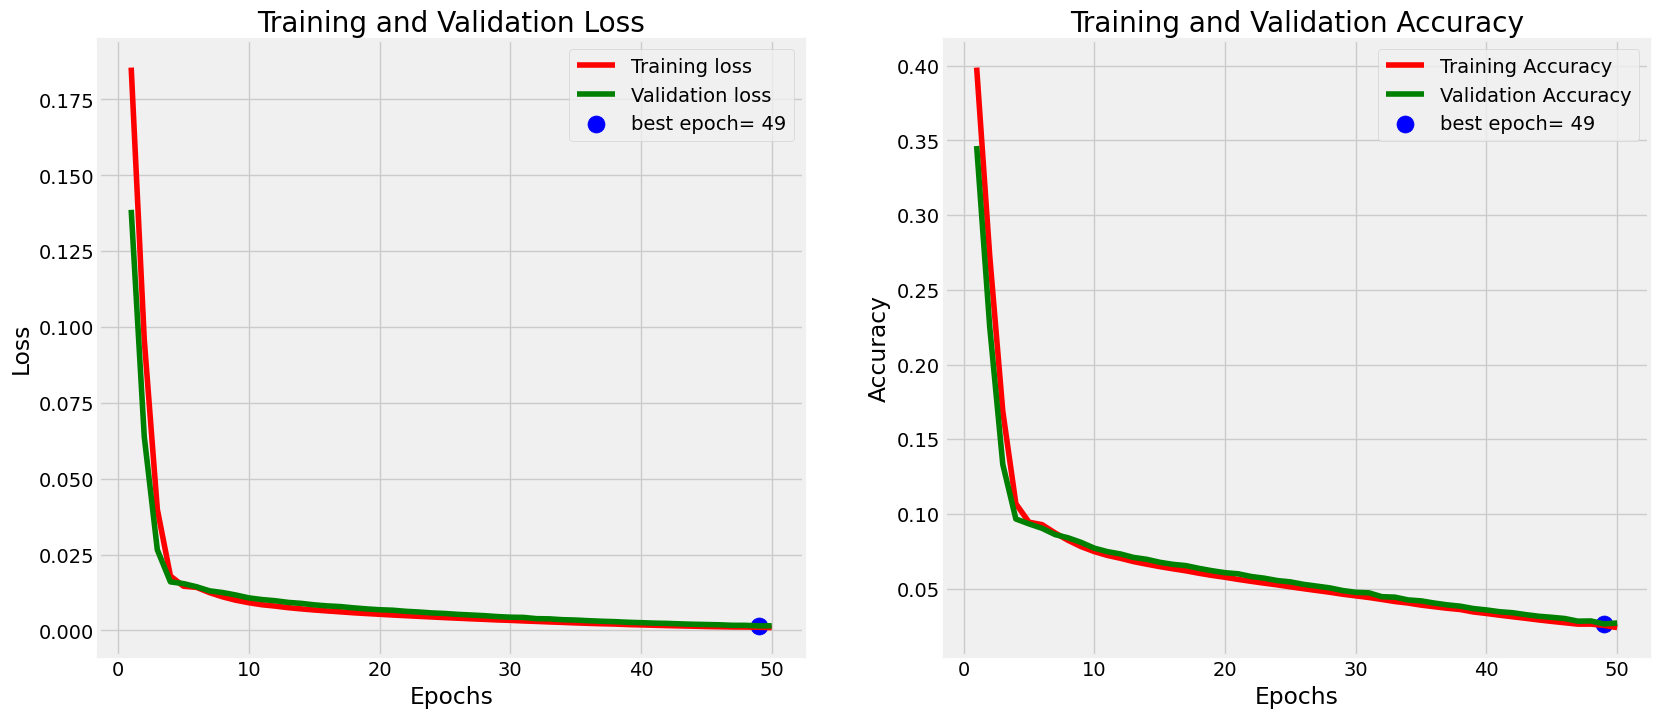

In [20]:
#Kode ini untuk membuat visualisasi kinerja model neural network selama pelatihan dengan memplot training loss, validation loss, training accuracy, dan validation accuracy terhadap jumlah epochs
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

Merupakan hasil grafik model ANN untuk setiap data yang diambil dalam data test

In [21]:
ann_y_pred = ann.predict(X_test) #digunakan untuk melakukan prediksi nilai target menggunakan model jaringan saraf tiruan (ANN) yang telah dilatih sebelumnya.



4/4 [==============================] - 0s 2ms/step


Model ANN dapat diuji dan diprediksi untuk mendapatkan nilai target pada data yang belum pernah dilihat sebelumnya (data test). Semakin tinggi nilai R2, semakin baik model ANN

In [22]:
r2 = r2_score(y_test, y_pred) #perintah untuk menghitung koefisien determinasi (R-squared) antara nilai target yang sebenarnya (y_test) dan nilai target yang diprediksi (y_pred). Fungsi r2_score() dari modul metrics di scikit-learn digunakan untuk menghitung R-squared. R-squared adalah ukuran yang mengukur seberapa baik variasi dalam nilai target yang dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 dan 1, dengan nilai yang lebih tinggi menunjukkan bahwa model dapat menjelaskan lebih banyak variasi dalam data target.
print('R2 score:', r2) # perintah untuk mencetak nilai koefisien determinasi (R-squared) yang telah dihitung sebelumnya.


R2 score: 0.9999999821310789


In [23]:
ann.evaluate(X_test, y_test) #digunakan untuk mengevaluasi kinerja model jaringan saraf tiruan (ANN) pada data pengujian. Metode ini akan menghitung nilai kerugian (loss) dan metrik lainnya yang telah ditentukan selama kompilasi model.


4/4 [==============================] - 0s 2ms/step - loss: 9.8322e-04 - mean_absolute_error: 0.0241


[0.0009832241339609027, 0.024100331589579582]

In [24]:
ann.predict([[40, 70000.500, 9550,534000]]) #digunakan untuk melakukan prediksi nilai target menggunakan model jaringan saraf tiruan (ANN) untuk satu atau beberapa data pengujian baru. Dalam hal ini, kita memberikan input fitur baru sebagai list dari list yang berisi satu baris data.
#[[40, 70000.500, 9550,534000]]: adalah input data baru yang ingin diprediksi. Data ini harus disediakan dalam bentuk list dari list, di mana setiap list dalam list tersebut mewakili satu baris data. Dalam hal ini, kita memberikan satu baris data yang memiliki empat fitur: umur (40), gaji tahunan (70000.500), hutang kartu kredit (9550), dan total tabungan (534000).


1/1 [==============================] - 0s 27ms/step


array([[188020.88]], dtype=float32)

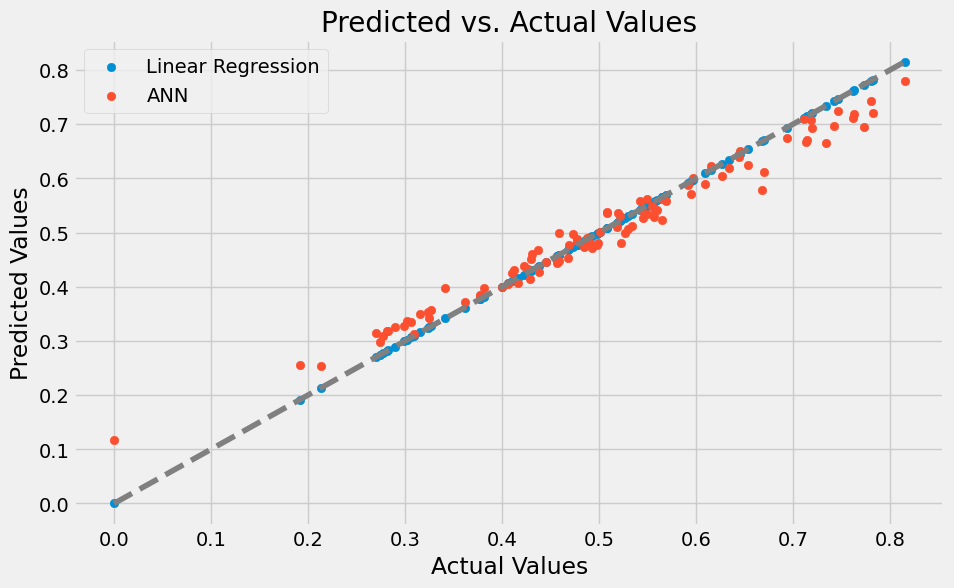

In [25]:
#Plot yang Anda hasilkan adalah plot scatter yang membandingkan nilai aktual (y_test) dengan nilai yang diprediksi oleh model regresi linear dan model neural network.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()



### **CONFUSION MATRIX**

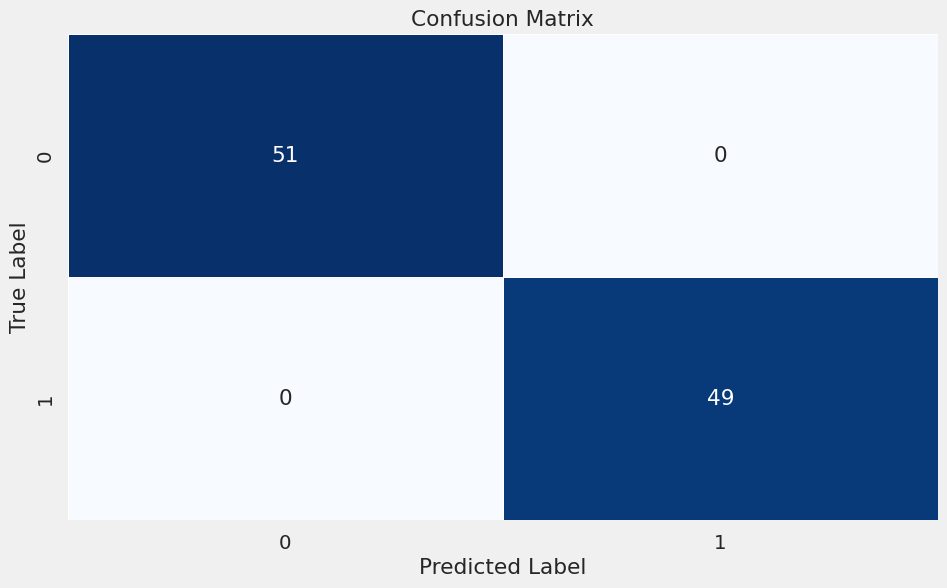

In [26]:
threshold = 0.5  # Misalnya, gunakan nilai 0.5 sebagai threshold

# Convert predictions to class labels
y_pred_class = (y_pred > threshold).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test > threshold, y_pred > threshold)

# Visualize confusion matrix using heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **Classification Report**

In [27]:
# Menentukan threshold
threshold = 0.5

# Mengubah prediksi menjadi label kelas
y_pred_class = (y_pred > threshold).astype(int)

# Menghitung classification report
classification_rep = classification_report(y_test > threshold, y_pred > threshold)

# Menampilkan classification report
print(classification_rep)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        51
        True       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

